# Visualisation Tools for Screening
### Version 0.3.0
#### Demo Project

This demo provides an example of using the *vis_tools_screening* package. 

It will cover:
1. Datasets - uploading built in ones or new ones
2. Basic statistical graphs and possible customisations
3. More advanced visualisations, including:
* Interactive bar charts
* Heatmaps
* Choropleth maps

### Datasets

Import one of the built-in training datasets:

In [16]:
# Import function to load the cleaned cervical cancer DataFrame from a local file into the notebook
import datasets as ds
# Run function
df = ds.load_cerv()

If you are using your own dataset. Ensure its columns include:
* 'Area Code', eg. 'E12000001'
* 'Area Name', eg. 'Exeter'
* 'Area Type', eg. 'LA'
* 'Time period', eg. 2010
* 'Value', eg. '77.5379545'
* 'Age', eg. '25-64 yrs'
* 'Sex', eg. 'Female'

### Basic Statistical Graphs
Basic graph tools are within the baseline.py module. 

In [17]:
# Import basline module
from baseline import *

#### Histogram 
Can choose the numeric column in the dataset to plot. 
Chance the parameters of the graph.
If you would like to learn more about the function run: help(histogram).

Help on function histogram in module baseline:

histogram(df, col, title='Plot', x_label='X', y_label='Y', fontsize=12, include_leg=False, figsize=(8, 5))
    Plots an customised histogram.
    Parameters:
    ----------
    df: pandas DataFrame
        dataframe containing the column user wishes to plot
    col: str
        name of the column to be plotted
    title: str
        the title of the plot, default="Plot"
    x_label: str
        name of X axis on the plot, default="X"
    y_label: str
        name of the Y axis on the plot, default="Y"
    fontsize: int
        size of the font, default=12
    include_leg: bool
        if True includes legend, default=True
    figsize: touple
        size of the figure in inches (width, height), default=(8,5)

A basic histogram plot of the data: 


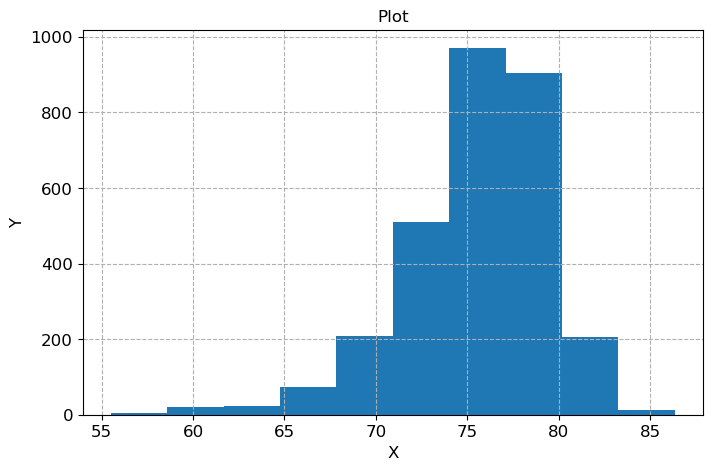

In [18]:
help(histogram)
print('A basic histogram plot of the data: ')
histogram(df, col='Value')

#### Line plot
Can plot the screening coverage of several or one area over time. 

A basic line plot of the data: 
Exeter
Mid Sussex
Horsham


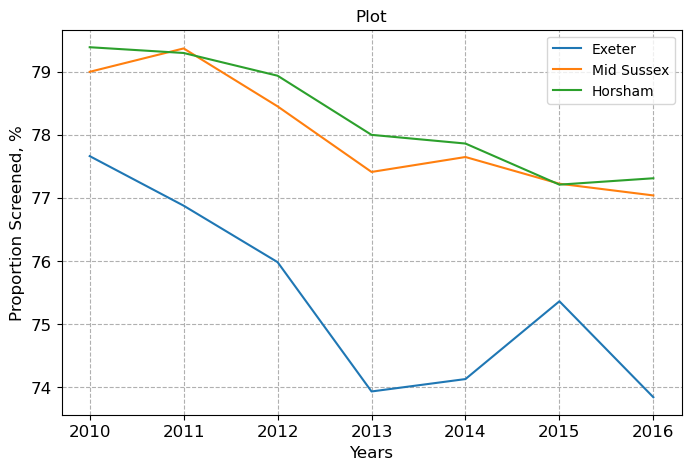

In [19]:
print('A basic line plot of the data: ')
linear_comp(df, area_list=['Exeter', 'Mid Sussex', 'Horsham'])

### Advanced visualisations
Tools for advanced visualisations are withing the visualisation module.

In [20]:
# Import tools for advanced visualisations
from visualisation import *

#### Heatmap 
Creates a map with 

<Figure size 2000x1000 with 0 Axes>

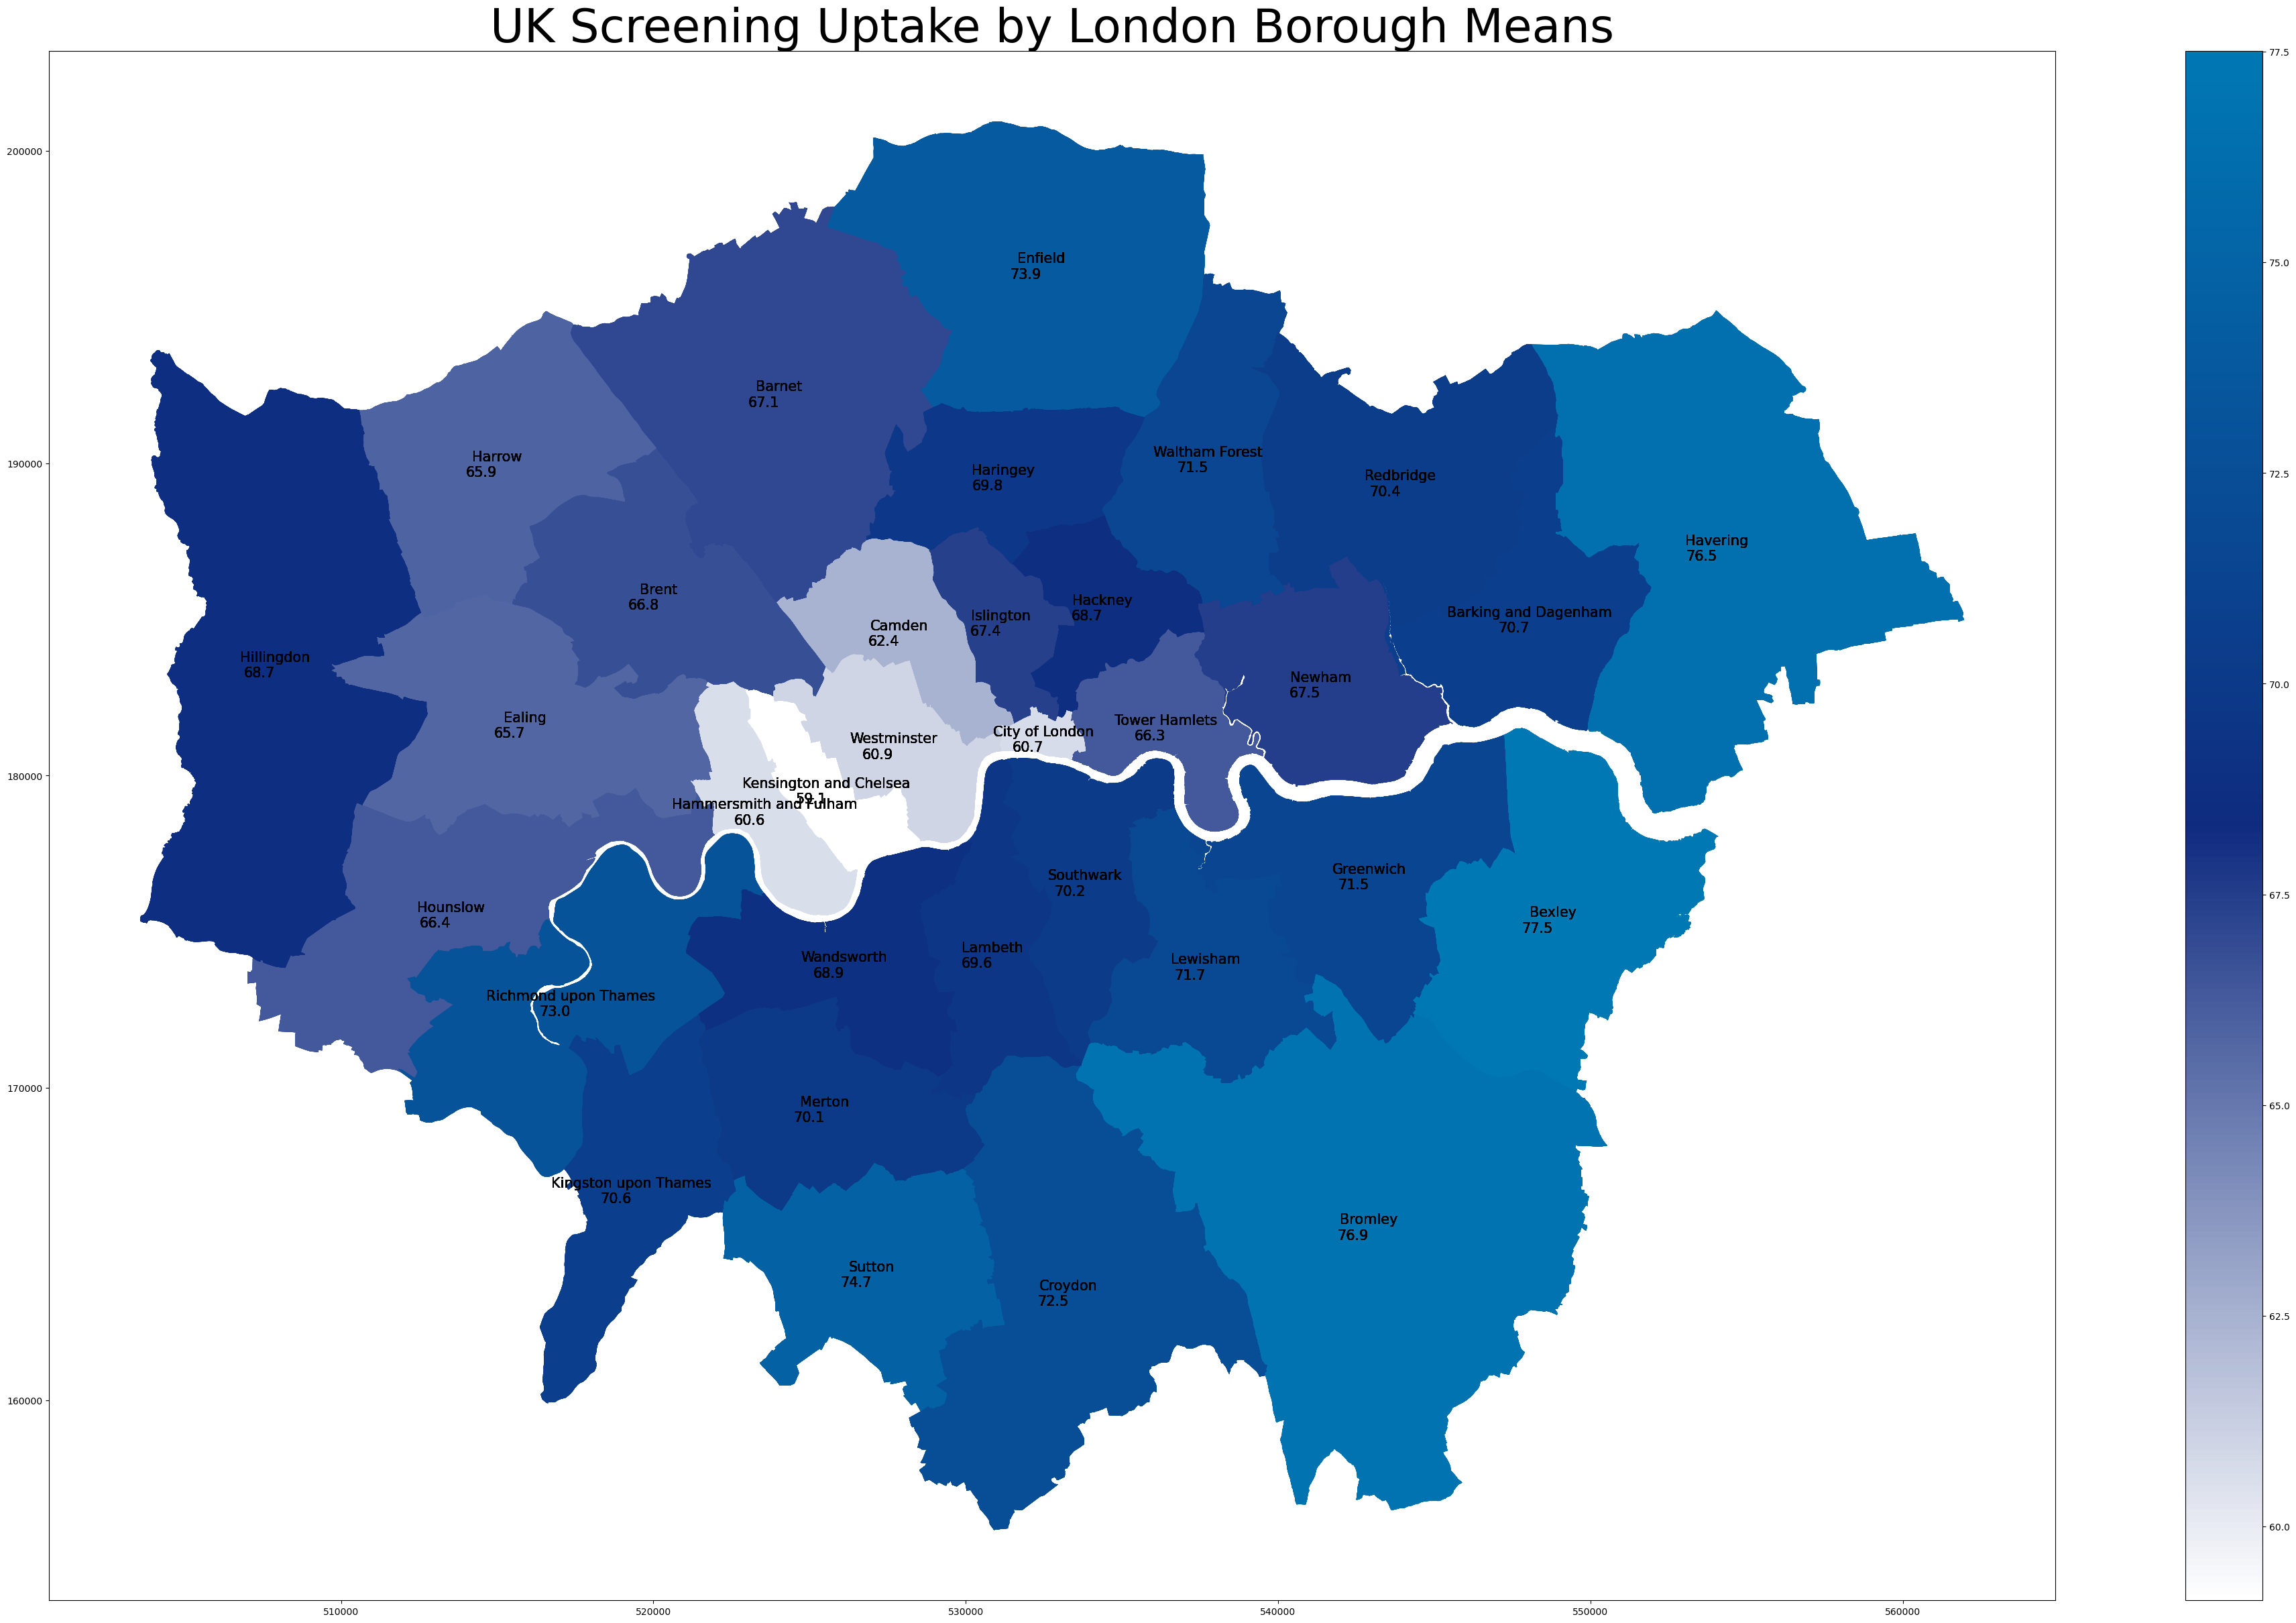

<Figure size 1920x1440 with 0 Axes>

In [21]:
# Plot a map of London and mean uptake across all years
ldn_map = LondonMap(df)
ldn_map.val_labels = True
ldn_map.plot_london_map()

In [22]:
# Plot a map of UK local authorities and mean uptake across in 2016, excluding London with Value (%) labels